In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("questions.csv")
df.shape

(404351, 6)

In [ ]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
272800,272800,536483,536484,How can you recover your Gmail password?,How can I recover my Gmail account's password?,1
297889,297889,585111,585112,How do you explain the existence of god when t...,How can God exist when there's so much poverty...,1
297744,297744,584828,584829,What is foveal vision?,Is 20/60 vision scalable?,0
122214,122214,242185,242186,When will India be ready to host the Olympics?,Will India ever host the Olympics?,1
146494,146494,289864,289865,Does Laravel support PHP 7?,What are the PHP frameworks that support PHP 7...,0
2421,2421,4842,4843,I want a real and effective way to make $ 500 ...,The real effective way to make $ 500 per month...,1
175869,175869,347438,347439,What are the most overrated professions in India?,What is the most overrated profession in India?,1
397923,397923,777514,777515,Why is Muslim world finding it so difficult to...,Considering destruction of world's great libra...,0
293751,293751,577070,577071,"What are the differences between sourcing, mer...",Why does every college in Delhi NCR not offer ...,0
188219,188219,371640,371641,How can I fix my sleeping schedule?,How do i fix a broken sleep schedule?,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
# duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

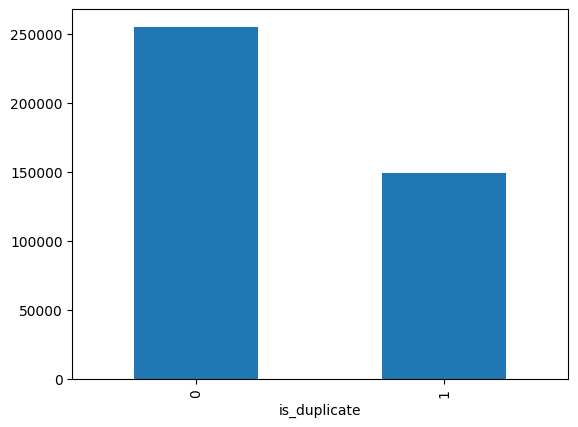

In [ ]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


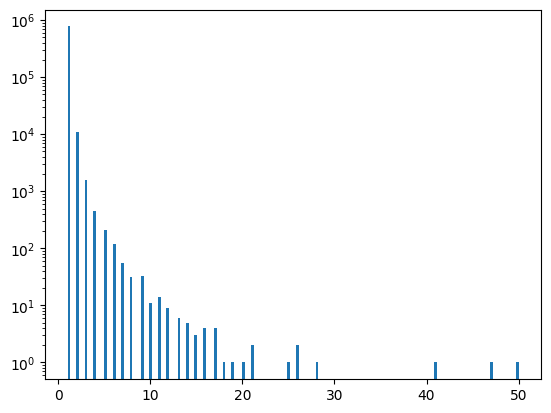

In [ ]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
new_df = df.sample(30000)

In [ ]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
new_df.duplicated().sum()

0

In [ ]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
212732,Does smoking weed is bad for health?,Is smoking weed good to health?
63113,I'm interested in the stock market. Where shou...,From where do I get the gyan to start trading ...
136200,"In layman's terms, how exactly was the Greece ...",What is the reason behind Greece's financial d...
214878,My dad is wealthy and supports me. I'm only 18...,Indians in foreign country?
311753,Which is the best smartphones below 9k?,What is the Best smartphone around 9k?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
212732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp_df['is_duplicate'] = new_df['is_duplicate']


In [ ]:
temp_df.head()


,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
212732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7431666666666666

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7315